In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import cv2
import resnet_V2
import data_util
import math
import keras.backend as K
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
tf.random.set_seed(42)

In [ ]:
## .h5 -> .pb 로 변환
model = keras.models.load_model('./model.h5', compile=False)      ## model.h5 load

export_path = './pb'
model.save(export_path, save_format="tf")

INFO:tensorflow:Assets written to: ./pb/assets


In [ ]:
#######################################
## convert to tensorflow lite example##

model = keras.models.load_model('./detector.h5', compile=False)  ## save h5 model
export_path = './pb'
model.save(export_path, save_format="tf")

saved_model_dir = './pb'    ## pb file directory


## basic tflite model export
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,
                                       tf.lite.OpsSet.SELECT_TF_OPS]
tflite_model = converter.convert()    ## convert
open('./tf/converted_model.tflite', 'wb').write(tflite_model)


## quantization tflite model export
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()    ## convert
open("./tf/converted_model_quant.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: ./pb/assets


2838832

# ***Load model.h5***

In [ ]:
model = keras.models.load_model('./model.h5', compile=False)  ## load h5 model

# ***Load image data***

In [ ]:
batch_size = 50

ds = data_util.get_cu_dataset(train_type='class', batch_size=batch_size)

In [ ]:
ds_size = len(list(ds))
ds_size

153

In [ ]:
train_size = int(0.7 * ds_size)
val_size = int(0.15 * ds_size)
test_size = int(0.15 * ds_size)

train_ds = ds.take(train_size)
test_ds = ds.skip(train_size)
val_ds = test_ds.skip(val_size)
test_ds = test_ds.take(test_size)

In [ ]:
test_size =len(list(test_ds))

In [ ]:
test_size

22

In [ ]:
for i in test_ds.take(1):
    print(i[0].shape)
    print(i[1].shape)

(50, 256, 256, 3)
(50, 149)


# ***TF Model***

In [ ]:
tf_model_predictions = model(i[0])
print("Prediction results shape:", tf_model_predictions.shape)

Prediction results shape: (50, 149)


In [ ]:
tf_pred_dataframe = pd.DataFrame(tf_model_predictions.numpy())

print("Prediction results for the first elements")
tf_pred_dataframe.iloc[:,133:]

Prediction results for the first elements


,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148
0,100.371834,39.936741,114.920258,46.809395,123.236481,20.510571,121.157677,69.237373,103.931763,89.975739,84.762924,46.520615,76.432144,24.169189,89.861259,73.287079
1,120.188324,19.945192,141.988724,37.026184,156.841339,59.233456,134.447708,62.020576,108.853241,97.534531,97.393410,37.587032,93.395561,69.817047,102.387337,66.761803
2,124.557060,50.551682,160.289597,66.395485,193.229477,103.353325,149.331329,87.061089,128.047821,110.664658,84.428032,62.724113,36.591427,86.993912,108.404678,90.742859
3,133.802597,28.246738,144.103149,38.958778,168.496902,77.054535,145.344086,77.185852,123.673218,171.540573,119.593201,32.702068,110.859795,62.194118,111.262909,75.157227
4,157.997879,3.924397,181.682724,20.873655,195.040894,74.789879,172.736099,37.954441,161.879333,64.295593,135.995117,20.571825,134.847488,77.356697,151.467545,41.324421
5,119.947006,37.788815,153.938538,46.941170,169.707413,122.273590,134.022537,70.527855,77.039604,98.445351,83.835976,47.794762,61.993450,123.107964,82.252632,73.640427
6,144.403015,18.966063,161.776611,29.602882,168.247498,79.885590,160.846008,43.342377,157.335266,65.095573,133.225357,33.026096,137.294083,91.128036,141.726669,50.221046
7,124.390938,65.737541,156.997375,80.061165,196.270569,74.976082,157.347733,118.370636,121.970764,162.469330,88.131943,75.125832,35.301937,47.751545,94.080971,117.672615
8,124.062607,59.553150,154.817474,75.658302,220.852371,41.556690,142.921600,124.512627,83.813965,194.164291,89.213707,64.002106,61.657764,7.837863,81.984718,113.351486
9,144.176056,19.076916,169.163361,27.243921,208.103363,73.800766,167.762238,64.839111,141.053329,107.755287,116.219284,30.297613,100.356552,91.727264,124.976105,72.547089


# **TFlite Model**

In [ ]:
tflite_interpreter = tf.lite.Interpreter('./tf/converted_model.tflite')   ## tflite interpreter load

input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()

print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])

print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])

== Input details ==
name: serving_default_input_2:0
shape: [  1 256 256   3]
type: <class 'numpy.float32'>

== Output details ==
name: StatefulPartitionedCall:0
shape: [  1 149]
type: <class 'numpy.float32'>


In [ ]:
tflite_interpreter.resize_tensor_input(input_details[0]['index'], (batch_size, 256, 256, 3))
tflite_interpreter.resize_tensor_input(output_details[0]['index'], (batch_size, 149))
tflite_interpreter.allocate_tensors()

input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()

print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])

print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])

== Input details ==
name: serving_default_input_2:0
shape: [ 50 256 256   3]
type: <class 'numpy.float32'>

== Output details ==
name: StatefulPartitionedCall:0
shape: [ 50 149]
type: <class 'numpy.float32'>


In [ ]:
tflite_interpreter.set_tensor(input_details[0]['index'], i[0])

tflite_interpreter.invoke()

tflite_model_predictions = tflite_interpreter.get_tensor(output_details[0]['index'])
print("Prediction results shape:", tflite_model_predictions.shape)

Prediction results shape: (50, 149)


In [ ]:
tflite_pred_dataframe = pd.DataFrame(tflite_model_predictions)

print("TFLite prediction results for the first elements")
tflite_pred_dataframe.iloc[:,133:]   ## landmark prediction

TFLite prediction results for the first elements


,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148
0,100.371880,39.936737,114.920227,46.809376,123.236473,20.510553,121.157677,69.237381,103.931816,89.975769,84.762886,46.520615,76.432144,24.169191,89.861237,73.287071
1,120.188347,19.945240,141.988617,37.026199,156.841309,59.233402,134.447693,62.020622,108.853310,97.534531,97.393425,37.587040,93.395546,69.816971,102.387306,66.761780
2,124.557014,50.551655,160.289566,66.395485,193.229446,103.353271,149.331329,87.061073,128.047836,110.664604,84.427994,62.724155,36.591423,86.993896,108.404617,90.742844
3,133.802612,28.246737,144.103104,38.958759,168.496826,77.054497,145.344086,77.185852,123.673233,171.540451,119.593201,32.702038,110.859741,62.194118,111.262848,75.157234
4,157.998016,3.924418,181.682678,20.873648,195.040771,74.789856,172.736176,37.954441,161.879211,64.295601,135.995117,20.571796,134.847458,77.356674,151.467529,41.324429
5,119.947014,37.788826,153.938507,46.941154,169.707382,122.273521,134.022537,70.527878,77.039612,98.445389,83.835938,47.794781,61.993477,123.107903,82.252602,73.640427
6,144.403122,18.966082,161.776581,29.602892,168.247360,79.885597,160.846024,43.342361,157.335159,65.095573,133.225327,33.026104,137.294128,91.127960,141.726593,50.221039
7,124.390907,65.737541,156.997330,80.061211,196.270370,74.975998,157.347763,118.370621,121.970734,162.469193,88.131905,75.125847,35.301991,47.751537,94.080963,117.672585
8,124.062614,59.553127,154.817413,75.658310,220.852219,41.556694,142.921600,124.512634,83.813980,194.164200,89.213654,64.002121,61.657780,7.837896,81.984695,113.351463
9,144.176102,19.076927,169.163330,27.243929,208.103317,73.800774,167.762375,64.839111,141.053391,107.755295,116.219208,30.297630,100.356529,91.727280,124.976044,72.547058


# ***Quantization TFlite Model***

In [ ]:
# Load quantized TFLite model
tflite_interpreter_quant = tf.lite.Interpreter(model_path='./tf/converted_model_quant.tflite')

# Learn about its input and output details
input_details = tflite_interpreter_quant.get_input_details()
output_details = tflite_interpreter_quant.get_output_details()

In [ ]:
# Resize input and output tensors to handle batch of 32 images
tflite_interpreter_quant.resize_tensor_input(input_details[0]['index'], (batch_size, 256, 256, 3))
tflite_interpreter_quant.resize_tensor_input(output_details[0]['index'], (batch_size, 149))
tflite_interpreter_quant.allocate_tensors()

input_details = tflite_interpreter_quant.get_input_details()
output_details = tflite_interpreter_quant.get_output_details()

print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])

print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])

== Input details ==
name: serving_default_input_2:0
shape: [ 50 256 256   3]
type: <class 'numpy.float32'>

== Output details ==
name: StatefulPartitionedCall:0
shape: [ 50 149]
type: <class 'numpy.float32'>


In [ ]:
# Run inference
tflite_interpreter_quant.set_tensor(input_details[0]['index'], i[0])

tflite_interpreter_quant.invoke()

tflite_q_model_predictions = tflite_interpreter_quant.get_tensor(output_details[0]['index'])
print("\nPrediction results shape:", tflite_q_model_predictions.shape)


Prediction results shape: (50, 149)


In [ ]:
# Convert prediction results to Pandas dataframe, for better visualization

tflite_q_pred_dataframe = pd.DataFrame(tflite_q_model_predictions)

print("Quantized TFLite model prediction results for the first elements")
tflite_q_pred_dataframe.iloc[:,133:]

Quantized TFLite model prediction results for the first elements


,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148
0,100.548409,39.632053,114.512299,47.095779,122.991890,20.547300,121.173584,69.449005,103.904037,89.942368,84.974976,46.607342,76.037773,24.009829,89.861946,73.425186
1,119.311119,19.195850,140.516312,36.405308,155.881577,62.289997,134.022415,61.553226,109.270409,96.804588,96.414742,37.401585,91.992783,71.882904,102.104401,67.047157
2,124.917786,50.036366,160.246872,66.787827,192.339706,103.534134,149.404083,87.218880,128.065292,110.426323,84.569351,62.639027,36.505463,87.273987,108.594879,91.078857
3,134.082809,27.807549,144.013397,39.410000,167.778641,77.319435,145.092148,77.057602,123.589409,171.436111,119.805145,32.449051,110.709625,61.479794,111.550446,74.988808
4,158.838974,3.733235,181.867935,21.107166,194.786789,75.168091,172.878860,37.965660,162.209152,64.290405,136.055893,20.636698,134.646332,76.949081,151.626328,41.414017
5,120.150772,37.571423,153.447296,47.062920,168.968979,122.462349,134.001022,70.654755,76.875862,98.686707,84.546417,47.933403,61.953934,123.093216,82.474304,74.080521
6,144.817093,18.758907,161.409134,29.834391,167.961594,80.111900,160.683807,43.150272,157.610214,65.011284,133.521347,33.031643,137.325333,90.646469,142.016830,50.076546
7,123.993752,65.540573,156.012299,80.448418,193.851639,73.590958,156.826797,118.458511,122.076454,162.270905,88.038887,75.150696,35.785782,47.097126,93.858444,118.139206
8,124.115265,58.831192,154.757950,75.531822,220.780716,41.672379,142.974182,124.802147,83.806885,193.786270,89.413895,63.919735,61.109486,8.599242,82.200470,113.727837
9,144.357727,18.620619,168.661911,27.269724,208.567703,72.933060,167.812515,64.735565,141.136444,108.096985,116.463631,30.031231,100.170105,90.732048,125.152504,72.680519


# ***Compare with base TF model(TFLite VS Quantization TFLite)***

In [ ]:
tflite_error = (abs(tf_pred_dataframe.iloc[:,133:]-tflite_pred_dataframe.iloc[:,133:])).mean(axis='columns').mean()     ## TF and TFlite difference

tflite_error :  3.0768514989176765e-05


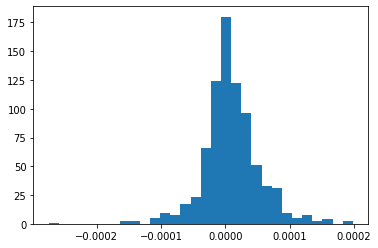

In [ ]:
plt.hist((tf_pred_dataframe.iloc[:,133:]-tflite_pred_dataframe.iloc[:,133:]).to_numpy().reshape(-1,),30)
print("tflite_error : ", tflite_error)

In [ ]:
tflite_quant_error = (abs(tf_pred_dataframe.iloc[:,133:]-tflite_q_pred_dataframe.iloc[:,133:])).mean(axis='columns').mean()   ## TF and TFlite Quantization difference

tflite_quant_error :  0.3115254044532776


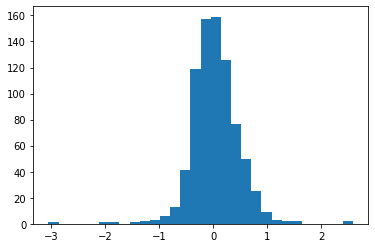

In [ ]:
plt.hist((tf_pred_dataframe.iloc[:,133:]-tflite_q_pred_dataframe.iloc[:,133:]).to_numpy().reshape(-1,),30)
print("tflite_quant_error : ", tflite_quant_error)

In [ ]:
tf_model_simple_dataframe, 
tflite_pred_dataframe, 
tflite_q_pred_dataframe